Pocisk o wadze 50kg został wystrzelony w górę z tarasu znajdującego się na wysokości 100m ponad gruntem z prędkością 60 [m/s]. 

Wyznacz: 
    1)wysokość na jaką się wzniósł
    2)wartość prędkości podczas uderzenia o grunt,
    
przyjmując, że siła oporu powietrza jest opisana relacją F = 5v

In [ ]:
Równanie ruchu pocisku z równania ruchu Newtona:
    m*d^2h/d^2t = - mg - F_oporu

Pocisk osiągnie swoją maksymalną wysokość h =  231.895395494306  [m], po czasie t =  4.771977197719772  [s]
Pocisk uderzy o ziemię w czasie t =  12.533753375337533  [s]
W czasie uderzenia o ziemię jego prędkość to v =   -52.95443451078128  [m/s]


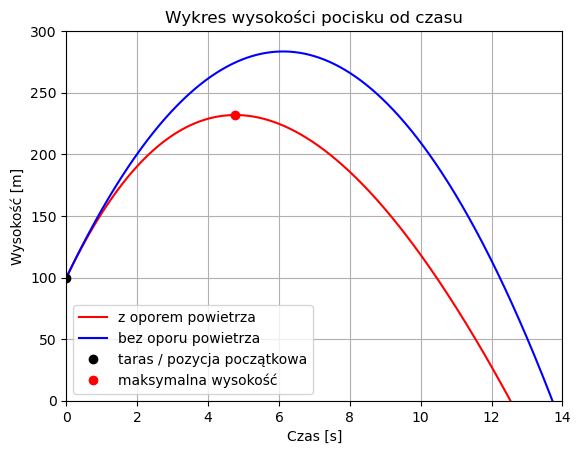

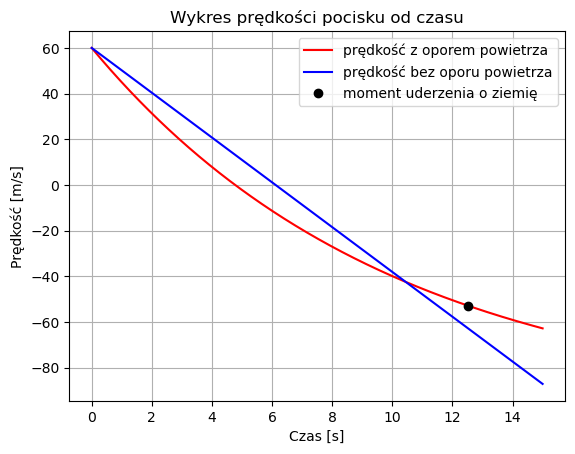

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

#VARIABLES
g = 9.81 #[m/s^2] - przyspieszenie grawitacyjne
v_0 = 60 #[m/s] - prędkość początkowa
m = 50 #[kg] - masa pocisku
h_0 = 100 #[m] - wysokość z której został wystrzelony
t_span = (0, 15) # - symulacja od 0 do 15s | dla solvera
t_eval = np.linspace(0, 15, 10000) # - tablica wartości czasowych do obliczeń


#FUNCTIONS
def opor(v): #Opór powietrza z relacji F = 5v
    return 5 * v

def equations(t, var): #Równania do solvera
    h, v, = var #wysokość, prędkość
    dh_dt = v
    dv_dt = (-g) - opor(v) / m
    return [dh_dt, dv_dt]

def bez_oporu(y_0, v_0, t): #trajektoria bez oporu dla porównania
    y = y_0 + (v_0 * t) - ((g*t*t) / 2)
    v = v_0 - g*t
    return [y, v]

def max_height(v): #zwraca index dla czasu w którym pocisk osiąga maksymalną wysokość
    return np.where(v <= 0)[0][0] #kiedy wartość prędkości ma ujemny znak, pierwsza wartość = zmiana znaku

def final_velocity(h):
    return np.where(h <=0)[0][0] #kiedy wartość prędkości ma ujemny znak, pierwsza wartość = uderzenie o ziemie


#RESULTS
sol = scipy.integrate.solve_ivp(equations, t_span, [h_0, v_0], t_eval = t_eval) #solver do rozwiązania wysokości i prędkości
h, v = sol.y #rozpakowanie otrzymanych wartości z solvera

h_t, v_t = bez_oporu(100, 60, t_eval) #pozycje i prędkości pocisku bez oporu powietrza dla porówniania

max_h_ind = max_height(v) #indeks dla którego wysokośc osiąga maksymalną wartość\
end_v_ind = final_velocity(h) #indeks dla prędkości uderzenia o ziemię

#WRITING OUT
print("Pocisk osiągnie swoją maksymalną wysokość h = ", h[max_h_ind], " [m], po czasie t = ", t_eval[max_h_ind], " [s]")
print("Pocisk uderzy o ziemię w czasie t = ", t_eval[end_v_ind], " [s]")
print("W czasie uderzenia o ziemię jego prędkość to v =  ", v[end_v_ind], " [m/s]")


#PLOTTING
plt.figure() #graf wysokości od czasu
plt.plot(t_eval, h, color = "red", label = "z oporem powietrza") #pocisk z oporem
plt.plot(t_eval, h_t, color = "blue", label = "bez oporu powietrza") #pocisk bez oporu
plt.plot(0,100, "o", color = "black", label = "taras / pozycja początkowa") #pozycja początkowa
plt.plot(t_eval[max_h_ind], h[max_h_ind], "o", color = "red", label = "maksymalna wysokość")
plt.grid(True)
plt.ylim(0,300)
plt.xlim(0,14)
plt.xlabel("Czas [s]")
plt.ylabel("Wysokość [m]")
plt.title("Wykres wysokości pocisku od czasu")
plt.legend()
#------------------------
plt.figure()
plt.plot(t_eval, v, color = "red", label = "prędkość z oporem powietrza")
plt.plot(t_eval, v_t, color = "blue", label = "prędkość bez oporu powietrza")
plt.plot(t_eval[end_v_ind], v[end_v_ind], "o", color="black", label="moment uderzenia o ziemię")
plt.grid(True)
plt.xlabel("Czas [s]")
plt.ylabel("Prędkość [m/s]")
plt.title("Wykres prędkości pocisku od czasu")
plt.legend()